# Multiple tube generation experiment processing

![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20](id26en40lm40rm5mr20.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20
![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10](id26en40lm40rm5mr10.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10

In [1629]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1630]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats
import seaborn as sns


In [1631]:
datapath = "~/teigen_data/output_rows.csv"

In [1632]:
plotkw ={
    "figsize": [9, 6], 
    # "fontsize": 14
}

In [1633]:
available_radius_methods = [
    "inscribed", "circumscribed", 
    "average",
    "cylinder volume", 
    "cylinder surface", 
    "cylinder volume + sphere error",
    "cylinder volume + sphere error + man",
    "cylinder surface + sphere error",
    "cylinder surface + sphere error + join error",
    "cylinder surface + sphere error + join error man",
    "best",
    
]

In [1634]:

def show_error(dfs, x_key="measurement_resolution", radius_method=""):
    
    dfsp = dfs[["surface error [%]", "volume error [%]", 
                x_key]].sort_values(x_key)

    if len(dfsp) < 1:
        return dfsp
    wxparams = {
        # "correction": True,
        "correction": False,
        "zero_method": "pratt"
        #"zero_method": "wilcox"
    }
    # wilcoxon - čím větší, tím lepší, alespoň 0.05
    surf_w = scipy.stats.wilcoxon(x=dfs["surface [mm^2]"], y=dfs["numeric surface [mm^2]"], **wxparams)
    # spearman čím menší, tím lepší
    surf_s = scipy.stats.spearmanr(dfs["surface [mm^2]"], dfs["numeric surface [mm^2]"])
    
    # wilcoxon - čím větší, tím lepší
    vol_w = scipy.stats.wilcoxon(x=dfs["volume [mm^3]"], y=dfs["numeric volume [mm^3]"], **wxparams)
    # spearman čím menší, tím lepší
    vol_s = scipy.stats.spearmanr(dfs["volume [mm^3]"], dfs["numeric volume [mm^3]"])
    
    print radius_method, ": \nsurface (w/s): \n" , surf_w,"\n", surf_s, "\nvolume (w/s): \n", vol_w, "\n",vol_s, "\n", len(dfsp)

    fig = plt.figure(figsize=[25, 18])
    ax = plt.subplot(133)
    dfsp[["surface error [%]"]].plot(
        ax=ax, kind="box", **plotkw)
    ax = plt.subplot(131)
    dfsp.plot(
        ax=ax, x=x_key, **plotkw)
    ax = plt.subplot(132)
    dfsp[["volume error [%]"]].plot(
        ax=ax, kind="box", **plotkw)
    plt.suptitle(radius_method)
    return dfsp

In [1635]:
def dfplot(dfs, plotkw, radius_method=""):
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    return show_error(dfsp, radius_method=radius_method)
    

In [1636]:
df = pd.read_csv(op.expanduser(datapath))
pp(df.keys())

# df

Index([u'appearance noise_preview', u'appearance show_aposteriori_surface',
       u'appearance skip_volume_generation', u'area volume [mm^3]',
       u'areasampling areasize_mm', u'areasampling areasize_px',
       u'areasampling voxelsize_mm', u'count []', u'datetime', u'filepattern',
       u'generator_id', u'generators Continuous tubes element_number',
       u'generators Continuous tubes fixed_radius_distribution',
       u'generators Continuous tubes normal_radius_distribution',
       u'generators Continuous tubes radius_distribution_maximum',
       u'generators Continuous tubes radius_distribution_mean',
       u'generators Continuous tubes radius_distribution_minimum',
       u'generators Continuous tubes radius_distribution_standard_deviation',
       u'generators Continuous tubes random_generator_seed',
       u'generators Continuous tubes uniform_radius_distribution',
       u'generators Gensei n_objects',
       u'generators Unconnected tubes allow_overlap',
       u'gene

In [1637]:
df

,appearance noise_preview,appearance show_aposteriori_surface,appearance skip_volume_generation,area volume [mm^3],areasampling areasize_mm,areasampling areasize_px,areasampling voxelsize_mm,count [],datetime,filepattern,...,step1_total_time_s,step2_generate_volume_time_s,step2_init_datetime,step2_numeric_measurement_time_s,step2_save_volume_time_s,step2_total_time_s,surface [mm^2],surface d. [mm^-1],volume [mm^3],volume d. []
0,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",6.0,"[datetime.datetime(2017, 6, 21, 0, 48, 20, 509...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[14.49985],NaN,NaN,NaN,NaN,NaN,18947.008520,0.017225,114490.135118,0.104082
1,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",7.0,"[datetime.datetime(2017, 6, 21, 0, 48, 20, 509...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[20.910404],[0.088424],"[datetime.datetime(2017, 6, 21, 0, 48, 37, 734...",[0.066001],[2.168213],[2.322638],20459.296911,0.018599,114762.766878,0.104330
2,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 6, 21, 0, 56, 5, 4209...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.972342],NaN,NaN,NaN,NaN,NaN,7147.123287,0.006497,54716.072050,0.049742
3,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 6, 21, 0, 56, 5, 4209...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.845123],[0.008741],"[datetime.datetime(2017, 6, 21, 0, 56, 8, 6118...",[0.039165],[1.838732],[1.886638],7147.123287,0.006497,54716.072050,0.049742
4,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 6, 21, 0, 56, 5, 4209...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.913607],[0.007697],"[datetime.datetime(2017, 6, 21, 0, 56, 10, 499...",[0.015805],[0.777474],[0.800976],7147.123287,0.006497,54716.072050,0.049742
5,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 6, 21, 0, 56, 5, 4209...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.52418],[0.009335],"[datetime.datetime(2017, 6, 21, 0, 56, 12, 509...",[0.02223],[0.77669],[0.808255],8796.459430,0.007997,71209.433481,0.064736
6,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 6, 21, 0, 56, 5, 4209...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.54454],[0.009132],"[datetime.datetime(2017, 6, 21, 0, 56, 14, 313...",[0.017232],[1.001],[1.027364],8796.459430,0.007997,71209.433481,0.064736
7,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 6, 21, 0, 56, 5, 4209...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.538459],[0.00768],"[datetime.datetime(2017, 6, 21, 0, 56, 16, 140...",[0.015266],[1.012309],[1.035255],8796.459430,0.007997,71209.433481,0.064736
8,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 6, 21, 0, 56, 5, 4209...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.940166],[0.00727],"[datetime.datetime(2017, 6, 21, 0, 56, 17, 979...",[0.016909],[1.03356],[1.057739],7147.123287,0.006497,54716.072050,0.049742
9,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 6, 21, 0, 56, 5, 4209...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.931361],[0.010533],"[datetime.datetime(2017, 6, 21, 0, 56, 19, 952...",[0.022357],[0.75787],[0.79076],7147.123287,0.006497,54716.072050,0.049742


In [1638]:

df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
df["length_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]


# Numeric measurement precision (element_numer = 20, length_mean = 15)

In [1639]:

dfs = df[
    df["output note"] == "resolution sphere"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
if len(dfsp) > 0:
    dfsp.plot(x="measurement_resolution", **plotkw)
dfsp

,surface error [%],volume error [%],measurement_resolution


In [1640]:

#sns.factorplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))


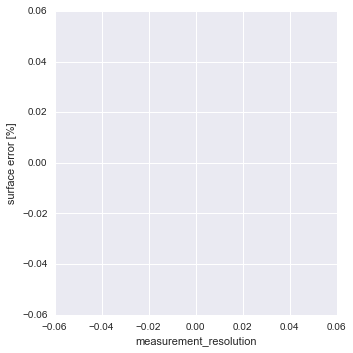

In [1641]:

sns.lmplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))

In [1642]:
dfs = df[
    df["output note"] == "resolution tube"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
if len(dfsp) > 0:
    dfsp.plot( x="measurement_resolution", **plotkw)
# dfsp

In [1643]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["output note"] == "tube length"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "length_distribution_mean"]].sort_values(
    "length_distribution_mean")
if len(dfsp) > 0:
    dfsp.plot( x="measurement_resolution", **plotkw)


In [1644]:
import seaborn as sns

In [1645]:
pd.__path__

['/Users/mjirik/miniconda/lib/python2.7/site-packages/pandas']

In [1646]:
pd.__version__

u'0.20.1'

In [1647]:
## element_number = 10, 
df["output note"]

0                     mix cylinder volume + sphere error
1                     mix cylinder volume + sphere error
2      compensation method 1 tube cylinder volume + s...
3      compensation method 1 tube cylinder surface + ...
4      compensation method 1 tube cylinder surface + ...
5      compensation method 1 tube cylinder volume + s...
6      compensation method 1 tube cylinder surface + ...
7      compensation method 1 tube cylinder surface + ...
8      compensation method 1 tube cylinder volume + s...
9      compensation method 1 tube cylinder surface + ...
10     compensation method 1 tube cylinder surface + ...
11     compensation method 1 tube cylinder volume + s...
12     compensation method 1 tube cylinder surface + ...
13     compensation method 1 tube cylinder surface + ...
14     compensation method 1 tube cylinder volume + s...
15     compensation method 1 tube cylinder surface + ...
16     compensation method 1 tube cylinder surface + ...
17     compensation method 1 tu

In [1648]:
display("<b>ahoj<b>")

'<b>ahoj<b>'

## Compensation methods

### 1 sphere

In [1649]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method 1 sphere " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    dfplot(dfs, plotkw, radius_method)
    


### 1 tube

cylinder volume + sphere error : 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=2.3815381687317265e-09) 
SpearmanrResult(correlation=0.97849022107138384, pvalue=1.7130762876685126e-32) 
volume (w/s): 
WilcoxonResult(statistic=481.0, pvalue=0.37968714125410385) 
SpearmanrResult(correlation=0.97849022107138384, pvalue=1.7130762876685126e-32) 
47
cylinder surface + sphere error : 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=2.3815381687317265e-09) 
SpearmanrResult(correlation=0.97849022107138384, pvalue=1.7130762876685126e-32) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=2.3815381687317265e-09) 
SpearmanrResult(correlation=0.97849022107138384, pvalue=1.7130762876685126e-32) 
47
cylinder surface + sphere error + join error : 
surface (w/s): 
WilcoxonResult(statistic=61.0, pvalue=1.6084305689682813e-07) 
SpearmanrResult(correlation=0.97751117833391443, pvalue=2.2134540570566672e-31) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=3.4994844362099034e-09) 
Spearma

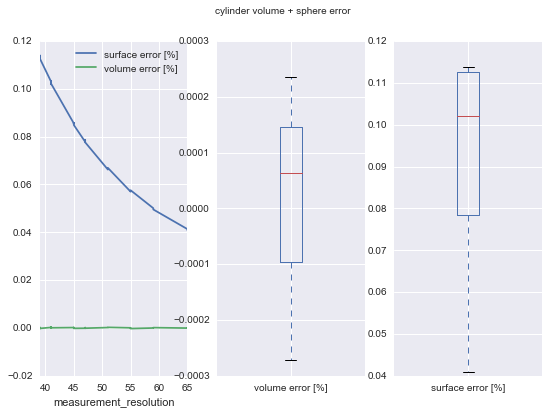

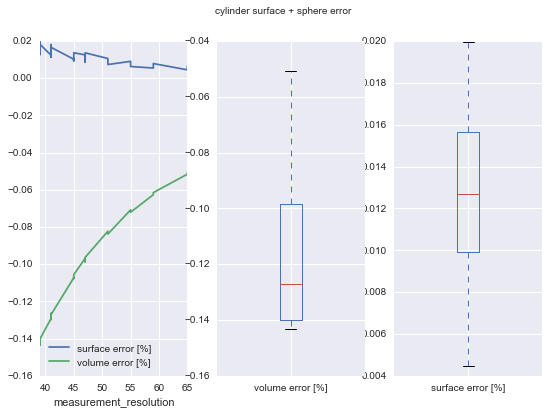

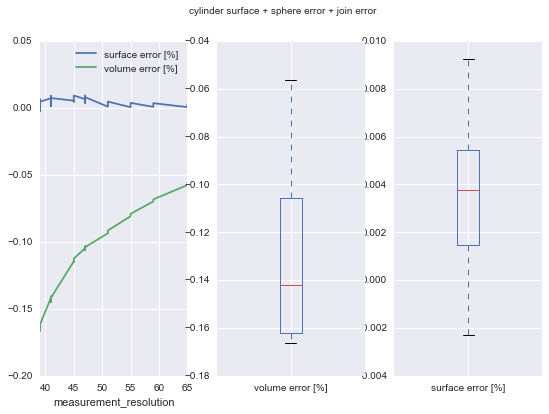

In [1650]:
for radius_method in available_radius_methods:
        
    dfs = df[
        df["output note"] == "compensation method 1 tube " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    show_error(dfs, radius_method=radius_method)
    # dfplot(dfs, plotkw, radius_method)


## N tubes

cylinder volume + sphere error : 
surface (w/s): 
WilcoxonResult(statistic=1322.0, pvalue=0.15287322541429824) 
SpearmanrResult(correlation=0.9886321397865877, pvalue=5.9488716434414135e-66) 
volume (w/s): 
WilcoxonResult(statistic=1012.0, pvalue=0.0035401234440642095) 
SpearmanrResult(correlation=0.9886321397865877, pvalue=5.9488716434414135e-66) 
80
cylinder surface + sphere error : 
surface (w/s): 
WilcoxonResult(statistic=1128.0, pvalue=0.01827289682760096) 
SpearmanrResult(correlation=0.9886321397865877, pvalue=5.9488716434414135e-66) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=7.795013017212223e-15) 
SpearmanrResult(correlation=0.9886321397865877, pvalue=5.9488716434414135e-66) 
80
cylinder surface + sphere error + join error : 
surface (w/s): 
WilcoxonResult(statistic=595.0, pvalue=1.4770958244253072e-06) 
SpearmanrResult(correlation=0.98851279502521405, pvalue=5.9397785406554159e-65) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.1411825404680716e-14) 
Spearman

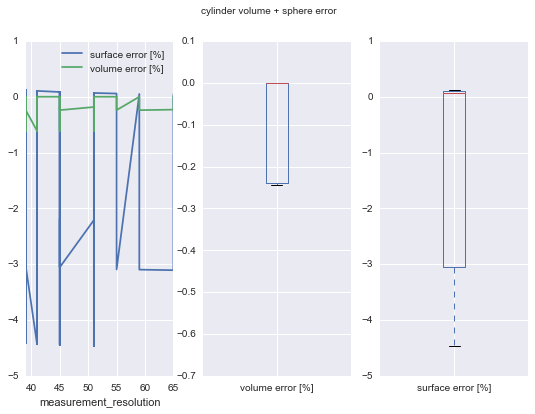

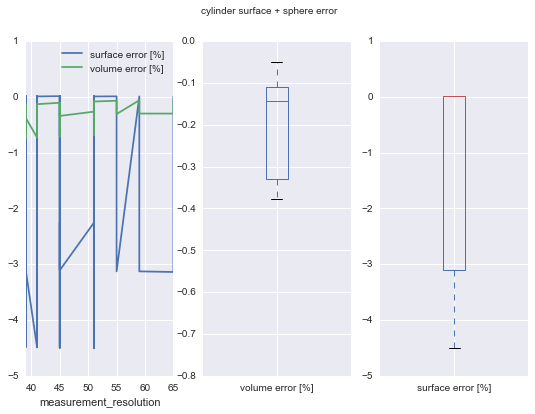

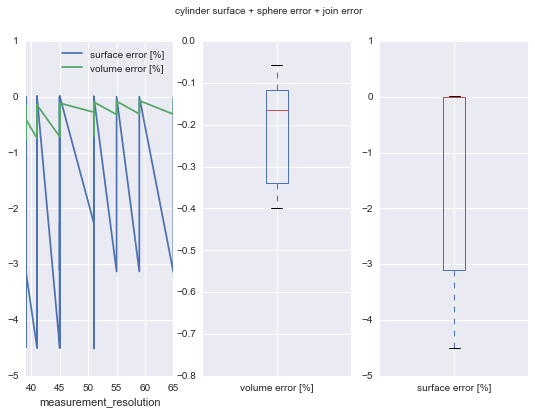

In [1651]:
for radius_method in available_radius_methods:
        
    dfs = df[
        df["output note"] == "compensation method N tube " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfsp = show_error(dfs, radius_method=radius_method)
    


## 5 tubes

 : 
surface (w/s): 
WilcoxonResult(statistic=6.0, pvalue=0.0021354993691861377) 
SpearmanrResult(correlation=0.96228518630569893, pvalue=1.0030313711383723e-08) 
volume (w/s): 
WilcoxonResult(statistic=6.0, pvalue=0.0021354993691861377) 
SpearmanrResult(correlation=0.96228518630569893, pvalue=1.0030313711383723e-08) 
15
 : 
surface (w/s): 
WilcoxonResult(statistic=6.0, pvalue=0.0056826340995906211) 
SpearmanrResult(correlation=0.94986032492756967, pvalue=6.8578223178107204e-07) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.0014443560411159027) 
SpearmanrResult(correlation=0.94986032492756967, pvalue=6.8578223178107204e-07) 
13
 : 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.0021658340010251402) 
SpearmanrResult(correlation=0.94112394811432021, pvalue=5.0447989717395539e-06) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.0021658340010251402) 
SpearmanrResult(correlation=0.94112394811432021, pvalue=5.0447989717395539e-06) 
12


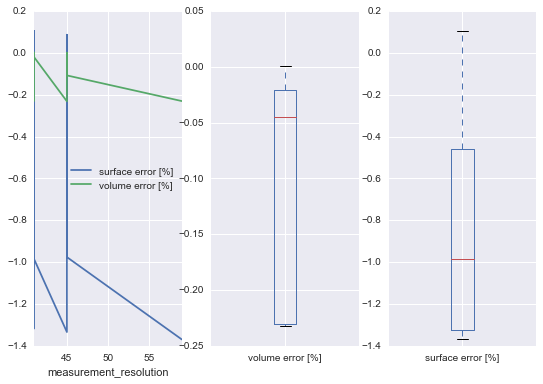

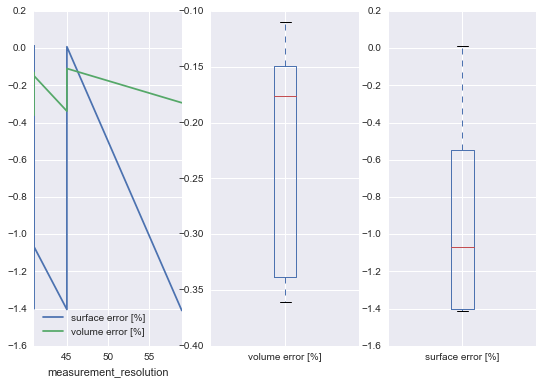

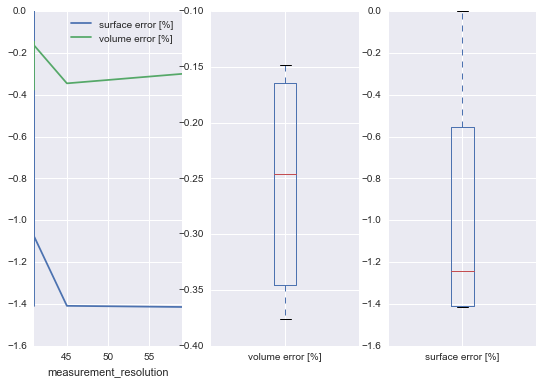

In [1652]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in available_radius_methods:
    dfs = df[
        df["output note"] ==  "compensation method 5 tubes " + radius_method
    ]
    dfsp = show_error(dfs)


In [1653]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", 
                      "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfplot(dfs, plotkw, radius_method)


### Mix 

cylinder volume + sphere error : 
surface (w/s): 
WilcoxonResult(statistic=51.0, pvalue=0.0015258331577479509) 
SpearmanrResult(correlation=0.9659111207526897, pvalue=1.3655310704475497e-15) 
volume (w/s): 
WilcoxonResult(statistic=136.0, pvalue=0.31458122165469127) 
SpearmanrResult(correlation=0.9659111207526897, pvalue=1.3655310704475497e-15) 
26
cylinder volume + sphere error + man : 
surface (w/s): 
WilcoxonResult(statistic=175.0, pvalue=2.2497247866676858e-05) 
SpearmanrResult(correlation=0.97247425614299154, pvalue=9.5293731253547036e-31) 
volume (w/s): 
WilcoxonResult(statistic=231.0, pvalue=0.00024847409611847266) 
SpearmanrResult(correlation=0.95352524777067127, pvalue=1.3267844257134455e-25) 
48
cylinder surface + sphere error + join error : 
surface (w/s): 
WilcoxonResult(statistic=273.0, pvalue=0.0012258805890900822) 
SpearmanrResult(correlation=0.9601016683234177, pvalue=4.2607504533729354e-27) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.5941661828408917e-09) 
S

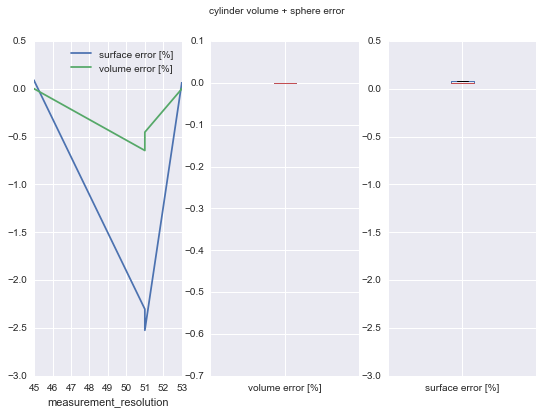

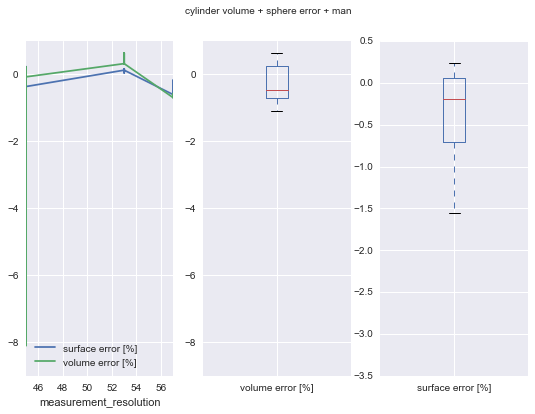

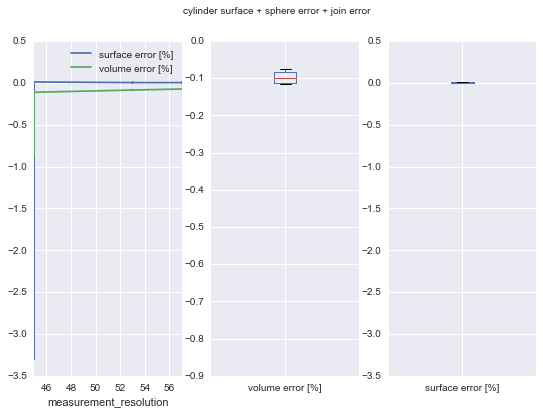

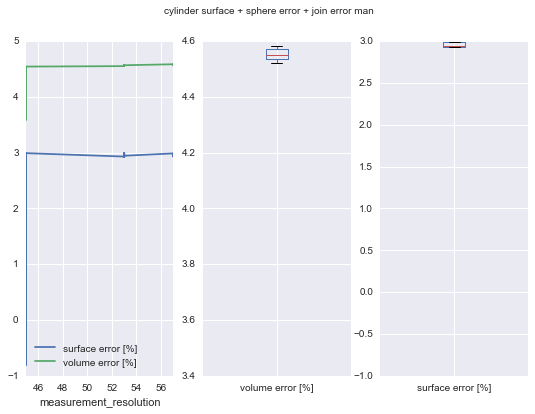

In [1654]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in available_radius_methods:
    dfs = df[
        df["output note"] ==  "mix " + radius_method
    ]
    dfsp = show_error(dfs, radius_method=radius_method)


cylinder surface + sphere error + join error : 
surface (w/s): 
WilcoxonResult(statistic=378.0, pvalue=0.35800092462302668) 
SpearmanrResult(correlation=0.97423293766594343, pvalue=1.7307991824701645e-27) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.6384489963229675e-08) 
SpearmanrResult(correlation=0.97423293766594343, pvalue=1.7307991824701645e-27) 
42


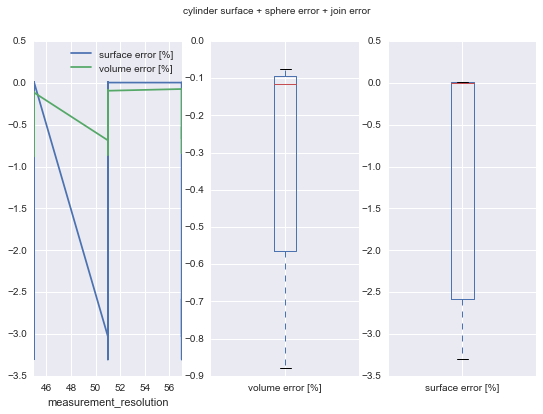

In [1655]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in available_radius_methods:
    dfs = df[
        df["output note"] ==  "mix 2 " + radius_method
    ]
    dfsp = show_error(dfs, radius_method=radius_method)


### Radius estimation

In [1656]:
dfs[["volume [mm^3]"]]

,volume [mm^3]


In [1657]:
### Kontrolní výpočet objemu

In [1658]:
v_sphere = (4.0/3.0) * np.pi * 20.0**3
v_sphere

33510.32163829113

In [1659]:
v_cylinder = np.pi*20.0**2 * 2.6696777
v_cylinder

3354.815939908998

In [1660]:
v_cylinder + v_sphere

36865.13757820013


# Numeric and analytic error

## measurement_resolution = 25

In [1661]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
# df["element_number"] = df["generators Unconnected tubes element_number"]
# df["length_distribution_mean"] = df["generators Unconnected tubes radius_distribution_mean"]
# df["radius_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]
dfs = df[
    df["output note"] == "compensation method 5 tubes " + "best"
]
dfsp = dfs[["volume [mm^3]", "numeric volume [mm^3]", "surface [mm^2]", "numeric surface [mm^2]", "surface error [%]", "volume error [%]"]]
dfsp

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%]


In [1662]:
if len(dfsp) > 0:
    axp = dfsp[["surface [mm^2]", "numeric surface [mm^2]"]].plot(kind="box", **plotkw)

In [1663]:
if len(dfsp) > 0:
    axp = dfsp[["volume [mm^3]", "numeric volume [mm^3]"]].plot(kind="box", **plotkw)

In [1664]:
if len(dfsp) > 0:
    axp = dfsp[["surface error [%]", "volume error [%]"]].plot(kind="box", **plotkw)

In [1665]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in ["cylinder surface", "cylinder volume", "cylinder volume + sphere compensation", "best"]:

        
    dfs = df[
        df["output note"] == "compensation method 5 tubes " + radius_method
    ]
    
    dfplot(dfs, plotkw, radius_method)


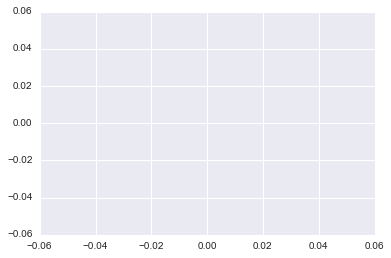

In [1666]:
nsu = dfsp["numeric surface [mm^2]"]
su = dfsp["surface [mm^2]"]
nsux = np.ones([len(nsu)])
sux = np.zeros([len(su)])
y = np.concatenate([nsu, su])
x = np.concatenate([nsux,sux])
#plot(, np.concatenate([nsux,sux]))
plt.plot(x, y)

In [1667]:
y.shape

(0,)

In [1668]:
x.shape

(0,)

In [1669]:
dfsp.describe()

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%]
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


# Statistics

In [1670]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in [
    "inscribed", 
    # "circumscribed", "cylinder surface", "cylinder volume",
    "average", 
    "cylinder volume + sphere compensation", 
    
    "best"]:

        
    dfs = df[
        df["output note"] == "fixed resolution " + radius_method
    ]
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    dfplot(dfs, plotkw, radius_method)


In [1671]:
dfs

,appearance noise_preview,appearance show_aposteriori_surface,appearance skip_volume_generation,area volume [mm^3],areasampling areasize_mm,areasampling areasize_px,areasampling voxelsize_mm,count [],datetime,filepattern,...,surface [mm^2],surface d. [mm^-1],volume [mm^3],volume d. [],surface error [mm^2],surface error [%],volume error [mm^3],volume error [%],measurement_resolution,length_distribution_mean


## Surface

In [1672]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfs["surface [mm^2]"], y=dfs["numeric surface [mm^2]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=nan)

In [1673]:
scipy.stats.wilcoxon(dfs["surface error [%]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=nan)

In [1674]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfs["surface [mm^2]"], dfs["numeric surface [mm^2]"])

SpearmanrResult(correlation=nan, pvalue=nan)

## Volume

In [1675]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfs["volume [mm^3]"], y=dfs["numeric volume [mm^3]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=nan)

In [1676]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfs["volume [mm^3]"], dfs["numeric volume [mm^3]"])

SpearmanrResult(correlation=nan, pvalue=nan)

# Inscribed to circum

In [1677]:
resolution = 6
radius = 10

alpha = (2*np.pi) / (resolution)
radius_out = radius / np.cos(alpha/2)

radius_out


11.547005383792515

In [1678]:
np.cos(np.pi/2)

6.123233995736766e-17